In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path

In [5]:
path_inf = Path("data/inf_220508-151157.json")
path_inf_damp = Path("data/inf_damp_220508-151315.json")

with open(path_inf, "r") as fd:
    data_raw_inf = json.load(fd)
with open(path_inf_damp, "r") as fd:
    data_raw_inf_damp = json.load(fd)

fs = data_raw_inf["fs"]
data_inf = np.array(data_raw_inf["data"])
data_inf_damp = np.array(data_raw_inf_damp["data"])

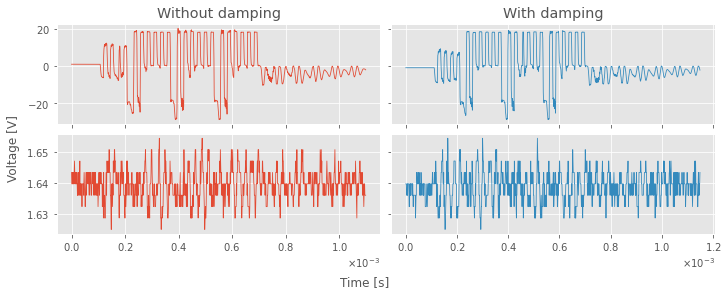

In [61]:
fig, ((atl, atr), (abl, abr)) = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10,4))



x = np.arange(len(data_inf[0][1100:2200,1])) / fs
atl.plot(x,       data_inf[0][1100:2200,1], c="C0")
abl.plot(x,       data_inf[0][1100:2200,0], c="C0")

x = np.arange(len(data_inf_damp[0][1250:2400,1])) / fs
atr.plot(x,       data_inf_damp[0][1250:2400,1], c="C1")
abr.plot(x,       data_inf_damp[0][1250:2400,0], c="C1")

fig.supxlabel("Time [s]")
fig.supylabel("Voltage [V]")
atl.set_title("Without damping")
atr.set_title("With damping")

fig.savefig("plot/damping.pdf")